# Data Modeling I: Probability and Statistics

## Introduction

### Why Probability and Statistics Matter in Science

Any physical measurement involves some level of uncertainty or noise.
Whether we are measuring the intensity of a star's light, the decay rate of a radioactive sample, or the temperature of the cosmic microwave background, the data we collect are never perfectly exact.
Probability theory offers a systematic way to handle this lack of certainty.
More specifically:
* **Data Interpretation**:
  We want to connect noisy observations to underlying physical models.
  If a dataset appears to fluctuate, is that signal real, or is it random?
  Probability gives us formal tools—like hypothesis testing or confidence intervals—to decide.
* **Incomplete Knowledge**:
  Even when processes are entirely deterministic at some level, we often lack complete information.
  Probability distributions let us quantify the range of possible outcomes or parameter values.
* **Unrepeatable Events**:
  Fields like astronomy pose a unique challenge: many phenomena (e.g., a supernova) cannot be restarted under controlled conditions.
  We must rely on "fair samples" of data from one-time observations.
  Probability theory becomes crucial for making sense of these non-repeatable experiments.

From a broad perspective, probability theory is the logic of science:
it extends our classical (Boolean) logic into a realm where conclusions cannot be absolutely certain but can be assigned degrees of belief or confidence.

### Historical Context and Key Contributors

Probability theory and its practical offshoot—statistics—did not emerge fully formed.
Many scientists who pioneered the subject were themselves astronomers or physicists grappling with noisy measurements:
* **Blaise Pascal & Pierre Fermat** (1650s):
  Their work on games of chance launched the formal study of probability, initially focusing on gambling problems but laying the groundwork for more general applications.
* **Jacob Bernoulli & Thomas Bayes** (18th century):
  They introduced foundational ideas on how to assign and update probabilities.
  Bayes's Theorem still underlies modern Bayesian statistics, which treats probability as "degree of belief" and updates those degrees using observed data.
* **Pierre-Simon Laplace & Carl Friedrich Gauss** (late 18th/early 19th century):
  Both were astronomers/mathematicians.
  Gauss's work on least squares and the "Gaussian (normal) distribution of errors" became central to how we handle measurement noise.
  Laplace's rediscovery of Bayesian methods brought probability firmly into the domain of scientific data interpretation.
* **Frequentist vs. Bayesian** (20th century):
  Mathematicians and statisticians debated how best to define, interpret, and use probabilities, especially for inference.
  The result was a rich theoretical framework that scientists still apply daily.

### Probability in Observational Fields (e.g., Astronomy)

The inherent randomness or incomplete knowledge in data is especially stark in astronomy and astrophysics:
1. Detection
   * We often ask: "Is this faint signal real, or is it simply noise?"
   * Probability-based hypothesis testing helps decide when a new source (like an exoplanet transit or a distant supernova) is detected with sufficient confidence.
2. Parameter Estimation
   * Astronomical models (e.g., cosmological models) include many parameters: densities of matter, dark energy, expansion rates, etc.
   * Observed data (galaxy distributions, microwave background fluctuations) are used in conjunction with statistical techniques (maximum likelihood, Bayesian inference) to estimate these parameters and their uncertainties.
3. Model Comparison
   * Even if multiple models fit the data well (e.g., different dark matter profiles, different supernova light-curve templates), probability theory guides us in choosing which model is "better supported" by the data.
4. Sampling Limitations
   * Astronomers typically cannot control the experiment—can't "turn off" a star or "re-run" a supernova to see if the same outcome occurs.
   * Instead, we rely on collecting large samples across space or time.
     Statistical arguments (assuming each event or source is an independent draw from an underlying population) become critical.

These points generalize beyond astronomy:
any domain with random influences or inherent uncertainty (particle physics, bio-physics experiments, sensor measurement in engineering, etc.) sees a central role for probability.

### Bread-and-Butter Statistical Aims

Across all these scientific domains, three recurring tasks stand out:
1. Hypothesis Testing
   * "Is the signal real or just random fluctuation?"
   * "Does this distribution deviate significantly from a known model?"
2. Parameter Estimation
   * "Given a theoretical model with free parameters, which parameter values best explain the observed data?"
   * Example: Fitting a light-curve model to a set of brightness measurements.
3. Model Comparison / Model Selection
   * "Which of two (or more) possible models is most consistent with the data?"
   * Are more complex models justified by the evidence, or does a simpler approach suffice?

## The Central Limit Theorem

### Mean and Variance: Powerful Summaries for Large Samples

In statistical data analysis, the mean and variance are often our first two diagnostic tools:
* **Mean**: Characterizes the typical or central value.
* **Variance**: Tells us how spread out the data are around that central value.

For small data samples, this may not fully capture all the nuances of a distribution.
However, once we collect a large number of measurements, mean and variance often suffice to describe the distribution of their sum (or average)---no matter how the individual measurements looked at first.
This is astonishing because you might expect different measurement processes---whether from mechanical vibrations, quantum noise, cosmic events, or sensor errors---should yield drastically different single-sample distributions.
And often they do!
But the **Central Limit Theorem** states that once we combine many independent samples, the distribution of those combined values approaches a Gaussian, making the mean and variance the key descriptors.

### Demo: Different Underlying Distributions Converge to a "Bell Shape"

Below is a Python code snippet that demonstrates the Central Limit Theorem for several distinct initial (single-draw) distributions.
We'll choose a few classic distributions: uniform, exponential, and poisson, to illustrate how sums of $n$ independent and identically distributed (IID) samples begin to look bell-shaped (Gaussian) as $n$ grows.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
# Define a set of different distributions (callables) that return samples:

dists = {
    "U(0,1)": lambda size: np.random.uniform    (0, 1,      size=size),
    "E(1.0)": lambda size: np.random.exponential(scale=1.0, size=size),
    "P(3.0)": lambda size: np.random.poisson    (lam=3.0,   size=size),
}

# List of 'n' values (number of draws per sum)
ns = 2**(2*np.arange(6))

# Number of times we generate each sum
n_sums = 1000

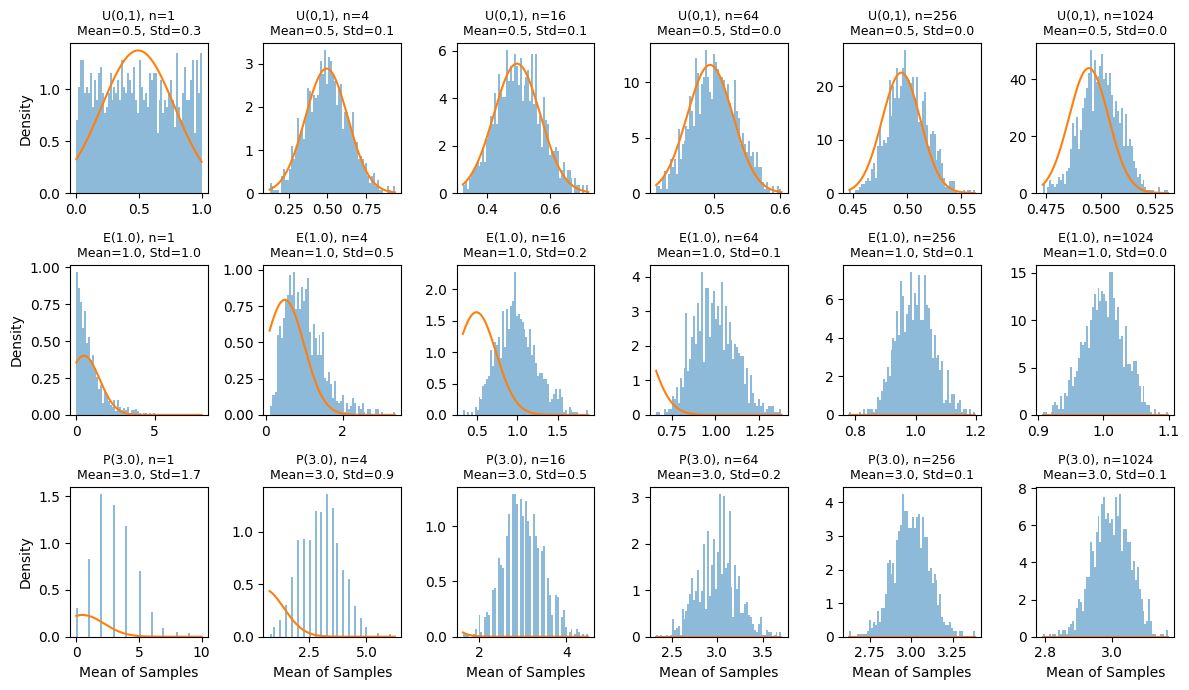

In [4]:
# Create a figure: rows = number of distributions, columns = number of n_list
fig, axes = plt.subplots(len(dists), len(ns), figsize=(12, 7))

for row, (name, func) in enumerate(dists.items()):
    for col, n in enumerate(ns):
        # Generate (n_sums x n) random samples from the chosen distribution
        data = func(size=(n_sums, n))

        # Average across each row
        avgs = np.mean(data, axis=1)
        mean  = np.mean(avgs)
        std  = np.std (avgs, ddof=1)

        # Overlay a Gaussian with that mean, std
        xs    = np.linspace(avgs.min(), avgs.max(), 200)
        gauss = norm.pdf(xs, loc=avg, scale=std)

        # Actuall plotting
        ax = axes[row, col]
        ax.hist(avgs, bins=64, density=True, alpha=0.5)
        ax.plot(xs, gauss)

        # Formatting
        ax.set_title(f"{name}, n={n}\nMean={avg:.1f}, Std={std:.1f}", fontsize=9)
        if row == len(dists) - 1:
            ax.set_xlabel("Mean of Samples")
        if col == 0:
            ax.set_ylabel("Density")

plt.tight_layout()

* Despite stark differences in how each single draw is generated, once you sum many draws, you see a clear tendency toward a Gaussian distribution (consistent with the Central Limit Theorem).
* For small $n$, the sum's histogram resembles the original distribution. As n grows, the sum's shape becomes smoother and bell-like, and just knowing the mean and variance of those sums provides an excellent approximation of the entire distribution.

### Statement of the Central Limit Theorem (CLT)

If you add up (or average) a large number of independent and identically distributed (IID) random variables, each with a finite mean $\mu$ and finite variance $\sigma^2$, then the distribution of those sums (or averages) converges to a Gaussian (Normal) distribution as $n$ grows.

Formally:
1. Let $X_1$, $X_2$, $\dots$, $X_n$ be IID random variables with mean $\mu$ and variance $\sigma^2$.
2. Define the sum $S_n = X_1 + X_2 + \dots + X_n$ and the average $\bar{X} = S_n / n$.
3. Then
   \begin{align}
     \lim_{n\to\infty}\frac{S_n - n\mu}{\sqrt{n}\,\sigma} = \mathcal{N}(0,1)
   \end{align}
   This states that after appropriate centering and scaling, $S_n$ behaves like a normal distribution with mean $n\mu$ and variance $n\sigma^2$.

### Proof Sketch with Characteristic Functions

While the Python demo gives an empirical feel, here's a brief outline of why the CLT holds:
1. **Characteristic Function**:
   A random variable $X$ has characteristic function
   \begin{align}
     \phi_X(k) = \langle e^{ikX}\rangle = \int e^{ikx} f_X(x) dx.
   \end{align}
   The characteristic function has two useful properties for this proof:
   * For small $k$,
     \begin{align}
       \phi_X(k) \approx \int (1 + ikx - \frac{1}{2}k^2x^2) f_X(x) dx = 1 + ik\mu - \frac{1}{2}k^2\sigma^2.
     \end{align}
   * For independent variables, the characteristic function of a sum is the product of the individual characteristic functions.

2. **Change of Variable**:
   Define $Y_j = (X_j - \mu)/\sigma$, we have $\langle Y_j \rangle = 0$ and $\text{var}(Y_j) = 1$.
   Therefore,
   \begin{align}
     Z_n \equiv \frac{S_n - n\mu}{\sqrt{n}\sigma} = \sum_j \frac{Y_j}{\sqrt{n}}.
   \end{align}

3. **Sum of IID Variables**:
   As a result,
   \begin{align}
     \phi_{Z_n}(k)
     \;=\; \prod_{j=1}^n \phi_{Y_j}\left(\frac{k}{\sqrt{n}}\right)
     \;=\; \left[\phi_{Y_1}\left(\frac{k}{\sqrt{n}}\right)\right]^n.
   \end{align}

4. **Expansion**:
   For small $k$ and/or large $n$:
   \begin{align}
     \phi_{Y_1}\!\left(\frac{k}{\sqrt{n}}\right)
     \approx 1 - \frac{k^2}{2n}.
   \end{align}

5. **Raise to $n$th Power**:
   \begin{align}
     \phi_{Z_n}(k) = \left[\phi_{Y_1}\!\left(\frac{k}{\sqrt{n}}\right)\right]^n
     \approx \left[1 - \frac{k^2}{2n}\right]^n
     \to e^{- k^2/2}
     \quad\text{as}\quad n\to\infty.
   \end{align}
   The limit on the right is exactly the characteristic function of a Gaussian of variable $Y_j$ with mean $0$ and variance $1$.
   Transform back to $X_j$, we conclude that $S_n$ (appropriately scaled) converges in distribution to a Gaussian, establishing the Central Limit Theorem.

### Consequences for Data Analysis

* **Gaussian-Like Errors**:
  Different instruments or phenomena might yield drastically different single-measurement distributions.
  Yet, aggregating many such independent measurements leads to near-Gaussian error distributions.
* **Reliance on Mean & Variance**:
  By the CLT, for large $n$, it's often enough to report the mean and variance to describe the resulting measurement distribution.
* **Practical**:
  Confidence intervals, hypothesis testing, and parameter estimation in physics commonly assume normality of the mean—an assumption justified by the CLT when sample sizes are large (and variables are independent).

## Foundational Probability Distributions

In many scientific measurements, certain probability distributions occur frequently.
These "workhorse" distributions (Binomial, Poisson, and Gaussian) describe scenarios spanning from simple binary-outcome trials to counting rare events to modeling aggregated measurement errors.

### Binomial Distribution

The Binomial distribution appears whenever you have:
1. A fixed number $N$ of independent trials.
2. Each trial can be classified as "success" or "failure" (two possible outcomes).
3. The probability of success $p$ remains the same for all trials.

The probability of getting exactly $k$ successes in $N$ trials is given by:
\begin{align}
  P(X = k) = {N \choose k} \, p^k \, (1 - p)^{\,N-k},
\end{align}
where ${N \choose k}$ is the binomial coefficient $N!/k!\,(N-k)!$.

Mean and Variance:
* Mean $= Np$.
* Variance $= Np(1-p)$.

Example Uses in Physics/Astronomy
* Detector "trigger" events:
  Suppose a particle detector has an $N$-panel array, each panel having a probability $p$ of registering a passing particle.
  The number of "hit" panels in one cosmic-ray event follows a Binomial distribution.
* Exoplanet detection (simplified):
  If you have a catalog of $N$ stars, each with a probability $p$ of showing a transit signal in a particular observation window, the total number of detected transits might approximate a Binomial distribution.

In [5]:
# DEMO: Exoplanet Detection Analogy

from scipy.stats import binom

In [6]:
# Parameters
N = 100   # number of stars observed
p = 0.1   # each star has a 10% chance of showing a detectable transit

# Range of possible detections
ks = np.arange(0, N+1)

# Binomial pmf
pmf = binom.pmf(ks, N, p)

Text(0, 0.5, 'Probability')

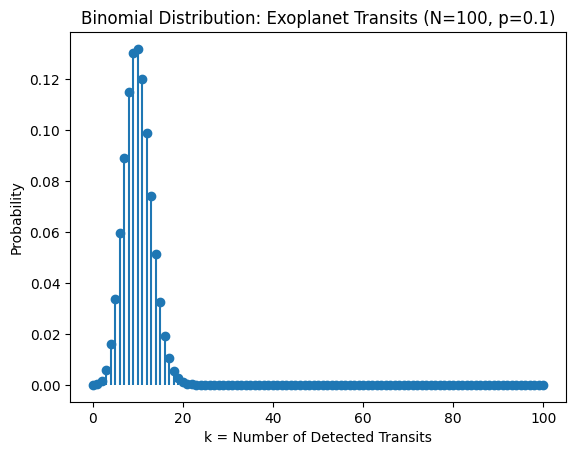

In [7]:
plt.stem(ks, pmf, basefmt=' ')
plt.title(f"Binomial Distribution: Exoplanet Transits (N={N}, p={p})")
plt.xlabel("k = Number of Detected Transits")
plt.ylabel("Probability")

Interpretation:
1. For each of the $N=100$ stars, either we "see" a transit (success) or we don't (failure).
2. The histogram/probability mass function (PMF) typically peaks near $Np = 10$.
3. The spread around that mean is $\sqrt{Np(1-p)}\approx 3$.

### Poisson Distribution

The Poisson distribution arises as a limit of the Binomial distribution when:
* $N\to\infty$ (huge number of trials),
* $p\to 0$ (very low probability of success),
* but the product $\lambda = Np$ remains constant.

In that regime, the number of successes X follows
\begin{align}
  P(X = k) = \frac{\lambda^k\,e^{-\lambda}}{k!},
\end{align}
where $\lambda$ is both the mean and the variance of the distribution.

Common in Physics/Astronomy:
* Photon Counting:
  If a faint source emits photons randomly, the photon arrival counts in a given time interval often follow a Poisson distribution.
* Radioactive Decay:
  The number of decays per unit time in a small sample can be modeled as Poisson with parameter $\lambda$.
* Cosmic-Ray Hits:
  If cosmic rays impinge on a small sensor with a low expected count $\lambda$ per unit time, the event count is Poisson.

In [8]:
# Demo: Photon Arrival Counts

from scipy.stats import poisson

In [9]:
# Suppose the star yields an average of 1 photons per 5 second
rate = 0.2
time = 60.0
obs  = rate * time  # total expected photons in the exposure

# Simulate a large number of exposures (observations)
n_obs  = 100_000
counts = np.random.poisson(lam=obs, size=n_obs)

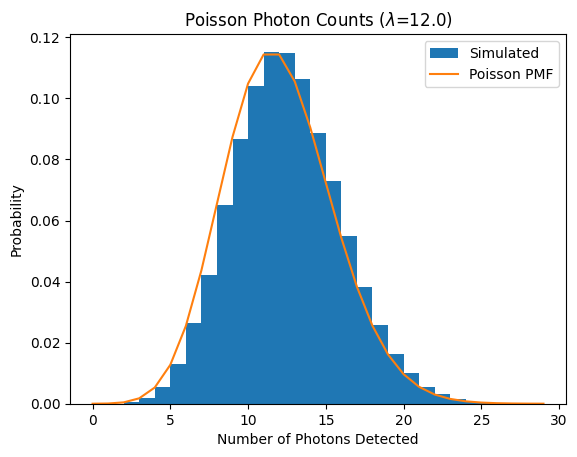

In [10]:
plt.hist(counts, bins=np.arange(30), density=True, label='Simulated')

# Overlay theoretical Poisson pmf
ks  = bins=np.arange(30)
pmf = poisson.pmf(ks, obs)
plt.plot(ks, pmf, label='Poisson PMF')

plt.title(r'Poisson Photon Counts ($\lambda$='+f'{obs})')
plt.xlabel('Number of Photons Detected')
plt.ylabel('Probability')
plt.legend()

Interpretation
1. The green histogram is the empirical distribution of photon counts over many simulated exposures.
2. The red dashed curve is the Poisson formula with $\lambda = \text{(rate)} \times \text{(time)} = 30$.
3. Mean = 12 and variance = 12.
   If you measure the sample mean and sample variance, they should be close to 30 each.

### Gaussian (Normal) Distribution

The Gaussian (Normal) distribution has density:
\begin{align}
  p(x) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp\!\left[-\frac{(x-\mu)^2}{2\sigma^2}\right].
\end{align}
It is fully characterized by:
* Mean $\mu$ and
* Variance $\sigma^2$.

We have already encountered the Central Limit Theorem (CLT) in a previous section, which explains why sums or averages of many IID random variables tend to a Gaussian distribution.
This is the deepest reason behind its ubiquity in physics for modeling errors and aggregates.

Real-World Usage:
* Measurement Noise:
  Instrumentation errors are often approximated by a normal distribution, especially when many small independent factors add up.
* Thermal Fluctuations:
  Velocities of particles in an ideal gas are normally distributed along each Cartesian axis (Maxwell–Boltzmann distribution is related).

In [11]:
# Demo: Random Measurement Errors

from scipy.stats import norm

In [15]:
flux = 100.0  # some arbitrary "true" flux units
std  = 5.0    # typical measurement error

n_sample = 10_000
fluxes = flux + np.random.normal(scale=std, size=n_sample)

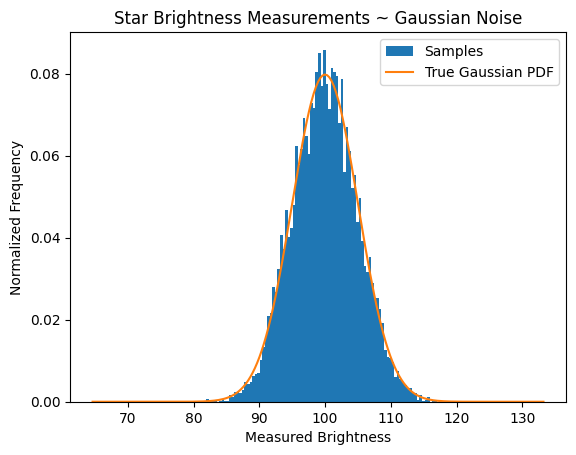

In [16]:
plt.hist(fluxes, bins=100, density=True, label='Samples')

# Overlay theoretical normal pdf
xs = np.linspace(
    min(fluxes)-3*std, 
    max(fluxes)+3*std, 
    201
)
pdf = norm.pdf(xs, loc=flux, scale=std)
plt.plot(xs, pdf, label='True Gaussian PDF')

plt.title("Star Brightness Measurements ~ Gaussian Noise")
plt.xlabel("Measured Brightness")
plt.ylabel("Normalized Frequency")
plt.legend()

Interpretation
1. Each measurement is the star's true brightness $\mu = 100$ plus a random error from $\mathcal{N}(0, 5^2)$.
2. The resulting histogram approximates a bell curve, well described by the overlaid theoretical pdf.
3. The measured mean and standard deviation should be close to 100 and 5.

## Parameter Estimation & Sample Statistics

### Sample Mean & Sample Variance

Let $\{X_1, X_2, \dots, X_n\}$ be IID samples from some distribution with (unknown) population mean $\mu$ and variance $\sigma^2$.
Two fundamental statistics are:

1. **Sample Mean**  
   \begin{align}
     \bar{X} = \frac{1}{n}\,\sum_{i=1}^n X_i,
   \end{align}
   where $\bar{X}$ estimates the true mean $\mu$.
   By the CLT, for large $n$, $\bar{X}$ is roughly normal with standard deviation $\sigma / \sqrt{n}$.

2. **Sample Variance** (with Bessel's correction):
   \begin{align}
   S^2 = \frac{1}{n - 1}\,\sum_{i=1}^n \left(X_i - \bar{X}\right)^2.
   \end{align}
   Dividing by $(n-1)$ rather than $n$ makes $S^2$ an **unbiased** estimator of $\sigma^2$.

Below is a snippet that repeatedly samples from a known Gaussian to compare the **average sample variance** when dividing by $n$ vs. dividing by $(n-1)$.

In [17]:
# True parameters
true_mean = 10.0
true_sigma = 2.0
true_var   = true_sigma**2

n_sample = [10, 100, 1000, 10000]
n_sims = 10_000  # Repeat "experiments" this many times per sample size

In [18]:
print("Bessel's Correction Demo")
print("-------------------------------------------------------------")
print(f"True Variance = {true_var:.6f}\n")

for n in n_sample:
    var_biased = []
    var        = []
    
    for _ in range(n_sims):
        data = np.random.normal(loc=true_mean, scale=true_sigma, size=n)
        
        # Sample variance with ddof=0 (divide by n)
        var_biased_j = np.var(data, ddof=0)
        # Sample variance with ddof=1 (divide by n-1)
        var_j        = np.var(data, ddof=1)
        
        var_biased.append(var_biased_j)
        var       .append(var_j)

    var_biased = np.mean(var_biased)
    var        = np.mean(var)

    print(f"Sample size n={n}:")
    print(f"  Mean var (divide by n)     = {var_biased:.6f}")
    print(f"  Mean var (divide by n-1)   = {var       :.6f}\n")

Bessel's Correction Demo
-------------------------------------------------------------
True Variance = 4.000000

Sample size n=10:
  Mean var (divide by n)     = 3.632192
  Mean var (divide by n-1)   = 4.035769

Sample size n=100:
  Mean var (divide by n)     = 3.963929
  Mean var (divide by n-1)   = 4.003968

Sample size n=1000:
  Mean var (divide by n)     = 3.999955
  Mean var (divide by n-1)   = 4.003959

Sample size n=10000:
  Mean var (divide by n)     = 3.998906
  Mean var (divide by n-1)   = 3.999306



### Maximum Likelihood Estimation (MLE)

The Maximum Likelihood approach generalizes the idea of using sample mean/variance for any parametric distribution.

Given data ${x_1,\dots,x_n}$ and a model $p(x \mid \theta)$ with unknown parameter(s) $\theta$:
1. Likelihood Function:
   \begin{align}
     \mathcal{L}(\theta) = \prod_{i=1}^n p(x_i;\theta).
   \end{align}
2. Log-Likelihood:
   \begin{align}
     \ell(\theta) = \ln\mathcal{L}(\theta) = \sum_{i=1}^n \ln p(x_i;\theta).
   \end{align}
3. MLE:
   \begin{align}
     \hat{\theta}_{\mathrm{MLE}} = \underset{\theta}{\mathrm{arg\,max}}\,\mathcal{L}(\theta).
   \end{align}
   Equivalently, it often suffices to maximize $\ell(\theta)$ because $\ln$ is monotonic.

For a specific case with a Poisson distribution
\begin{align}
  p(x_i;\lambda) = \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}
\end{align}
the log-likelihood is
\begin{align}
\ell(\lambda) = \sum_{i=1}^n \left[x_i \ln\lambda - \lambda - \ln(x_i!)\right].
\end{align}
Setting derivative = 0 leads to $\lambda = \sum x_i/n$.
In other words, the average of the counts.

### Confidence Intervals

In frequentist statistics, a **confidence interval (CI)** provides a range of parameter values that are not inconsistent with observed data, under a particular confidence level (e.g., 90%, 95%, or 99%).
A common misconception is that "there's a 95% probability the parameter lies in my observed interval."
Instead, the statement is:
if we repeated the same experiment many times, we would expect about 95% of those constructed intervals to contain the true parameter.

1. **Coverage vs. Probability**  
   A 95% CI "covers" the true parameter 95% of the time if we repeated the sampling *many* times.
   It does **not** say there's a 95% probability that the **specific** interval from this single dataset contains the true value.

3. **Boundary & Discrete Issues**  
   Negative lower bounds can appear in naive normal-based intervals for rates or proportions that must be $\ge 0$.
   Special intervals avoid this problem.

4. **Small Samples**  
   With few observations, normal approximations can be poor.
   T-distributions or exact methods generally yield more reliable intervals.

5. **Bias in the Data**  
   Even if the CI construction is correct, it only reflects the variation in the sampled data.
   Bias or other systematic omissions can make the sample unrepresentative, invalidating the CI in practice.

## Bias in Data Modeling

A **biased** dataset or measurement process can lead you to completely wrong conclusions about your parameters, even if you use sophisticated statistical techniques.
One of the most striking examples is **Survivorship Bias**---famously illustrated by WWII bomber analyses.

### Survivorship Bias Example

Imagine a WWII bomber returning from a mission.
You observe bullet holes scattered around its fuselage:
![A simplified WWII bomber diagram](https://upload.wikimedia.org/wikipedia/commons/b/b2/Survivorship-bias.svg)

Observations:
* The returning bomber has bullet holes in certain regions.
* Some areas have many holes, some have fewer.

Question: If you can add armor to only certain spots, **where** do you reinforce the airplane?*

**Common Initial Thought**:
Reinforce where you see the most bullet holes—those spots must be especially vulnerable.

**But**:
The bombers you see are the ones that **survived**.
Bombers with bullet holes in more critical places **didn't return** and thus are **missing** from your analysis!

**Abraham Wald**, a statistician, famously recognized that areas **without** bullet holes on returning planes were actually the vulnerable spots on *all* planes.
Those are where hits are fatal and cause the plane to be lost.
This systematic omission of "non-survivors" is the essence of **Survivorship Bias**.

### What Is Survivorship Bias?

Survivorship Bias arises when you focus only on the units that made it through some process (planes that returned, products that sold well, cosmic sources above a detection threshold, etc.), but ignore those that failed or fell below your selection criterion.
Consequently, your sample can appear to show:
* Higher durability or performance than is true for the full population.  
* Missing "fatal flaws" that caused other items in the population to drop out.  
* A systematically skewed distribution or parameter estimate, because the data you see do **not** represent the entire population.

### Why Bias Matters in Data Modeling

Even the most elegant statistical methods assume that your data are reasonably representative of the population or the experiment you intend to study.
If the dataset is biased, you can end up with:

1. **Incorrect Parameter Estimates**:
   E.g., overestimating average galaxy brightness because only bright galaxies make it into your catalog (the faint ones “didn’t survive” the detection limit).

2. **Misleading Hypothesis Tests**:
   E.g., concluding your device is extremely reliable if you only track units that have not yet failed, ignoring those that are out of commission.

3. **Flawed Modeling Decisions**:
   E.g., Designing a protective measure (armor or shielding) for only the areas you see damaged, when the real vulnerabilities are in the places that caused total loss or non-detection.

### Other Forms of Bias

* **Selection Bias**: Non-random selection of units or events.
* **Observer Bias**: Tendency to see what you expect.
* **Detection Thresholds**: Missing dim or low-energy events leads to incomplete samples.

### Physics & Astronomy Examples

1. **Galaxy Surveys**  
   * **Situation**:    Only galaxies above some brightness (or signal-to-noise) threshold are cataloged.  
   * **Survivorship**: Faint, smaller, or more distant galaxies "don’t survive" the detection pipeline.  
   * **Consequence**:  If you compute the “typical galaxy brightness” from these data, you might incorrectly conclude galaxies are generally very bright.

2. **Particle Energy Experiments**  
   * **Situation**:    A detector triggers only when the signal is above a set energy.  
   * **Survivorship**: Low-energy collisions never enter your dataset.  
   * **Consequence**:  The average energy in your sample is overestimated; it looks like “collisions are always high-energy.”

3. **Radioactive Decay Measurements**  
   * **Situation**:    You measure isotopes in a sample after a certain time.  
   * **Survivorship**: Short-lived isotopes already decayed; only longer-lived ones remain.  
   * **Consequence**:  The measured half-life distribution is shifted, inflating average lifetimes.

### Mitigating Survivorship Bias

1. **Understand Selection Effects**:
   Determine how data are "filtered" or lost.
   Construct a detection probability function if possible (like a completeness function in astronomy).

2. **Instrument / Threshold Adjustments**:
   Lower detection thresholds or gather deeper observations to include the "non-survivors" in the sample.

3. **Statistical Methods**:
   If some non-detections (or "failures") are known but unmeasured, incorporate partial data or censored data approaches (e.g., survival analysis in medical stats, but applicable to physics lifetimes).

4. **Cross-Validation**:
   Obtain data from multiple instruments or experiments to see if missing elements in one dataset appear in another.